<p dir = 'rtl' style="font-size: 36px;">
ورود کردن کتابخانه ها
</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import cv2

warnings.filterwarnings(action = 'ignore' , category = np.ComplexWarning)
warnings.filterwarnings(action = 'ignore' , category = RuntimeWarning)


<p dir = 'rtl' style="font-size: 36px;">
خواندن عکس و تغییر سایز برای راحتی و کم شدن بار محاسبات
</p>

In [28]:
PATH : str = r"C:\Users\AmirHussain\Desktop\Image-processing\photo_2024-04-10_02-03-34.jpg"
PATH1 : str = r"C:\Users\AmirHussain\Desktop\Image-processing\leviathan.png"


img = cv2.imread(PATH)
img_gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img1 = cv2.imread(PATH1)
img_gray1 =  cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img.shape

(1024, 1024, 3)

<p dir = 'rtl' style="font-size: 36px;" >
نمایش عکس اصلی
</p>

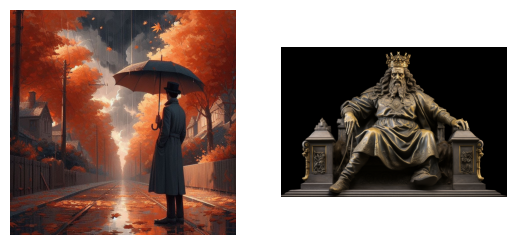

In [30]:
plt.subplot(121)
plt.imshow( cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  ) 
plt.axis("off")


plt.subplot(122)
plt.imshow( cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  ) 
plt.axis("off")
plt.show()


# Task 1

<p dir = 'rtl' style="font-size: 36px;" >
0 کردن مقادیردیگر کانال ها برای نمایش 
</p>

In [31]:
red_channel = img.copy()
red_channel[:, :, 1] = red_channel[:, :, 2] = 0  # Set green and blue channels to zero

green_channel = img.copy()
green_channel[:, :, 0] = green_channel[:, :, 2] = 0  # Set red and blue channels to zero

blue_channel = img.copy()
blue_channel[:, :, 0] = blue_channel[:, :, 1] = 0  # Set red and green channels to zero

<p dir = 'rtl' style="font-size: 36px; font : 'sans'; " >
نمایش عکس در 3 کانال RGB
</p>

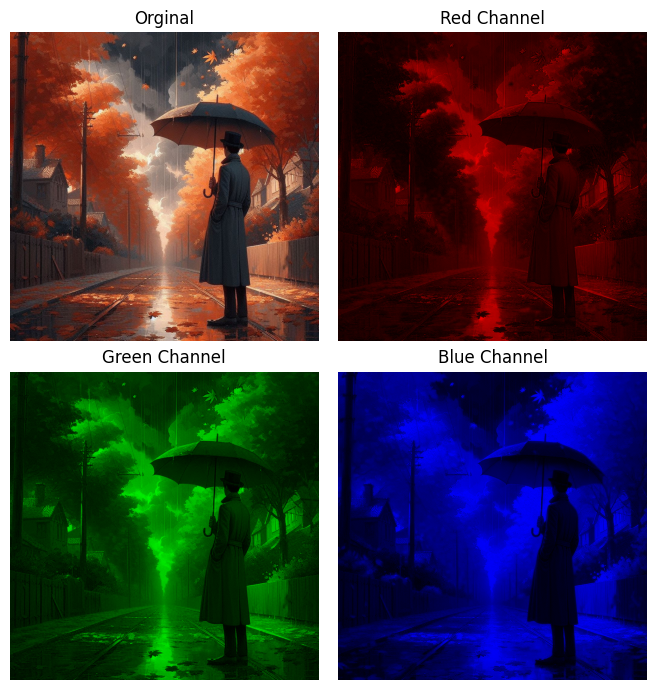

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(20, 7))
# ax[0,0].axis("off")


ax[0,0].set_title('Orginal')
ax[0,0].imshow( cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0,0].axis("off")

ax[0,1].set_title('Red Channel')
ax[0,1].imshow( red_channel)
ax[0,1].axis("off")

ax[1,0].set_title('Green Channel')
ax[1,0].imshow( green_channel)
ax[1,0].axis("off")

ax[1,1].set_title('Blue Channel')
ax[1,1].imshow( blue_channel )
ax[1,1].axis("off")

plt.tight_layout()


# Adjust the spacing between subplots
plt.subplots_adjust(wspace= -0.8 , hspace=.1)
plt.show()

# Task 2


In [6]:
def apply_fourier_transform(image):
    # Convert the image to grayscale
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Fourier Transform
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    return fshift

def apply_inverse_fourier_transform(fshift):
    # Apply Inverse Fourier Transform
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)

    # The transformed image could have complex values, we can take just the real part
    img_back = np.real(img_back)

    return img_back

In [7]:
def fourier_transform(image : np.ndarray):
    if image.ndim == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Compute the discrete Fourier Transform of the image
    fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
    # Shift the zero-frequency component to the center of the spectrum
    fourier_shift = np.fft.fftshift(fourier)
    # calculate the magnitude of the Fourier Transform
    magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
    # Scale the magnitude for display
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

    return  magnitude


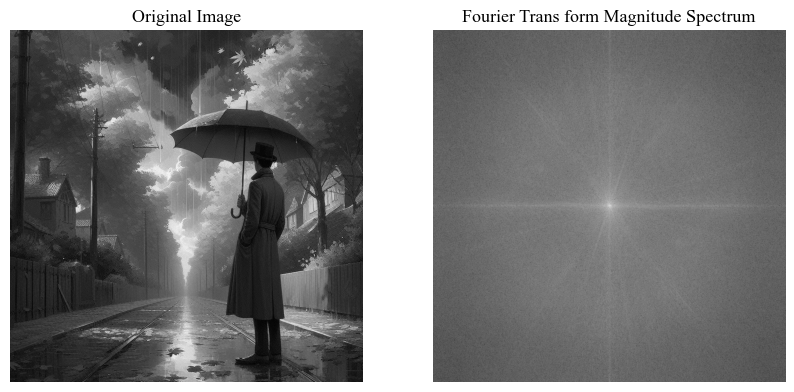

In [8]:
fontdict={'size' : 13 ,
          'font' : "Times New Roman"}

# Displaying the original image
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img_gray , cmap='grey')
plt.title('Original Image', fontdict=fontdict) 
plt.axis('off')

fft = fourier_transform(img)
# Displaying the Magnitude Spectrum
plt.subplot(122)
plt.imshow(fft, cmap='grey')
plt.title('Fourier Trans form Magnitude Spectrum', fontdict=fontdict) 
plt.axis('off')



plt.savefig("Fourier_Transform.png")
plt.show()

# Log transform


In [9]:
from typing import Literal


def log_transform(image : np.ndarray, 
                  C : Literal['auto'] | float = 'auto'):
    
    if C == "auto":
        C = 255 /np.log10(1 + np.max(image) )
    image_log = np.log10(image+1) * C
    return image_log.astype(np.uint8)



def  inverse_log_transform(log_image: np.ndarray, 
                           C : Literal['auto'] | float = 'auto') -> np.ndarray:
    if C == "auto":
        C = 255 /np.log10(1 + np.max(log_image) )
    else:
        pass
    inverse_log = pow(10, log_image / C) - 1

    return inverse_log.astype(np.uint8)

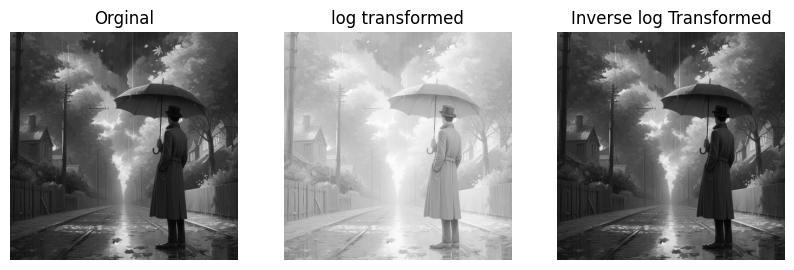

In [10]:
logged_image = log_transform(img_gray  )
logged_image_inverse = inverse_log_transform(logged_image    )

fig, ax = plt.subplots(1, 3, figsize=(10, 7) )

ax[0].set_title('Orginal')
ax[0].imshow( img_gray, cmap = 'gray' )
ax[0].axis("off")

ax[1].set_title('log transformed')
ax[1].imshow( logged_image, cmap = 'gray' )
ax[1].axis("off")

ax[2].set_title('Inverse log Transformed')
ax[2].imshow( logged_image_inverse , cmap = 'gray')
ax[2].axis("off")

plt.show()

# Power ( Gamma ) Filter

In [11]:
def power(image : np.ndarray, c: float , Gamma : float):
    # c = 255*(image / 255)
    s = c * pow(image, Gamma)
    # s = cv2.normalize(s, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    return s

def depower(image : np.ndarray , c : float , Gamma: float):
    s = c * pow(image, Gamma )
    # s = cv2.normalize(s, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    return s

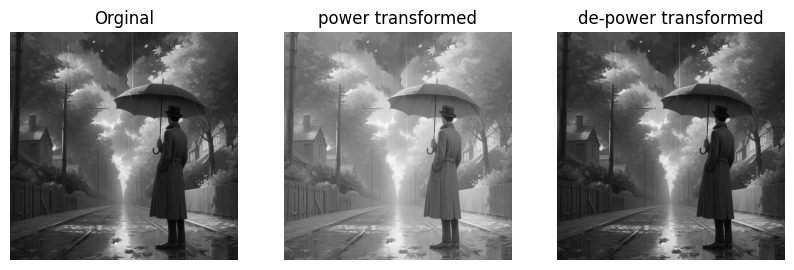

In [38]:
gamma = .5
rev_gamma = 1 / gamma
c = 10
powr = power(img_gray , c=c , Gamma = gamma )
depowr = power(powr , c=c  , Gamma= rev_gamma )


fig, ax = plt.subplots(1, 3, figsize=(10, 7)  )


ax[0].set_title('Orginal')
ax[0].imshow( img_gray, cmap = 'gray' )
ax[0].axis('off')

ax[1].set_title('power transformed')
ax[1].imshow( powr, cmap = 'gray' )
ax[1].axis('off')

ax[2].set_title('de-power transformed')
ax[2].imshow( depowr, cmap = 'gray' )
ax[2].axis('off')

plt.show()

1048576


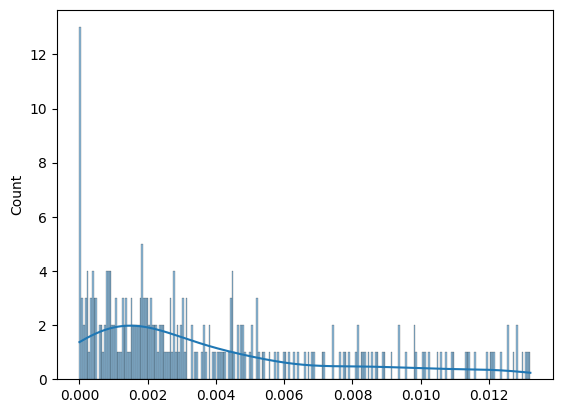

In [39]:
from collections import Counter
import seaborn as sns


def pr(imag ):
    M, N = imag.shape
    MN = M * N
    # Count the number of pixels in each row and column
    count = Counter(imag.reshape(-1))
    count = dict(sorted(count.items() , key= lambda x : x[0]))
    print(np.sum(list(count.values())))
    P = {}
    for k , v in count.items():
        P[k] = v / MN

    return P

def ps(count : dict ):
    MN = np.sum(list( count.values()))
    # Count the number of pixels in each row and column
    P = {}
    for k , v in count.items():
        P[k] = v / MN

    return P



hist_eq = pr(img_gray)


sns.histplot(hist_eq,bins = 255, kde=True)
plt.axis('on')
plt.show()

In [40]:
def sk(pr : dict ):
    L_1 = 255
    s = pr.copy()
    for k in range(L_1):
        sigma_pj = [j for j in list(pr.values())[:k+1]]
        s[k] = int(L_1 * np.sum(sigma_pj ))
    return s

Sk = sk(hist_eq)


In [41]:
rk_nk = Counter(img_gray.reshape(-1))
rk = list(rk_nk.keys())
nk = list(rk_nk.values())


new_vals = {r : [] for r in rk }

for r, v in rk_nk.items():
    for l, n in Sk.items():
        if n == r :
            new_vals[r].append(l)
        
new_p = {r : 0 for r in rk}
for k,v in new_vals.items():
    for i in v :
        new_p[k] += nk[i]


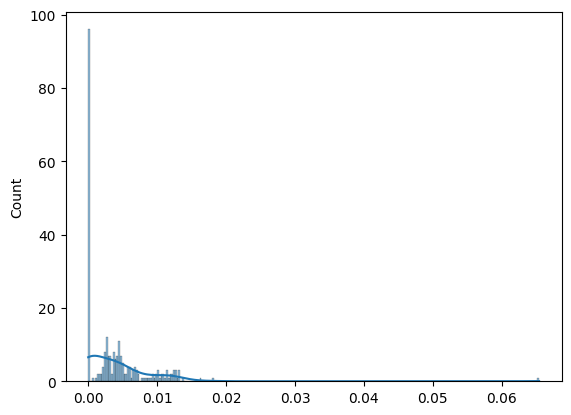

In [42]:
Ps = ps(new_p)

sns.histplot(Ps,bins = 255,  kde=True)
plt.show()

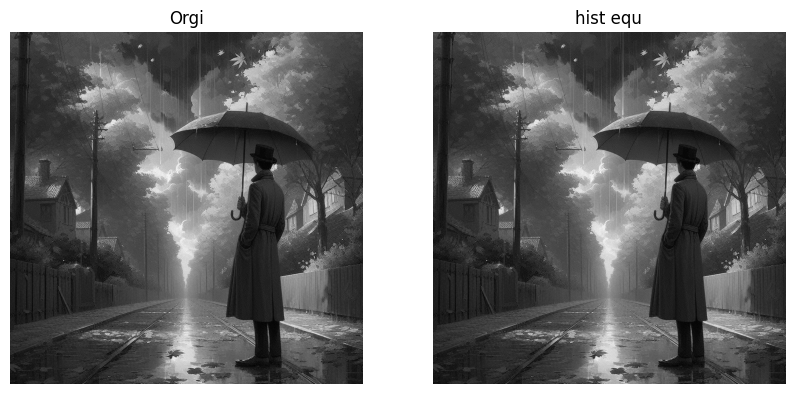

In [43]:
new_img = img_gray.reshape(1024, 1024)

for k, v in Sk.items():
    nws = np.where(new_img == k , v ,new_img ) 


plt.figure(figsize=(10,5))
plt.subplot(121) , plt.imshow(img_gray, cmap='gray') ,plt.title("Orgi") , plt.axis('off') 
plt.subplot(122) , plt.imshow(new_img, cmap='gray') ,plt.title("hist equ") , plt.axis('off') 

plt.show()